# Task I: Quantum Computing Part 

1) implement a simple quantum operation with Cirq or Pennylane
    
    a) With 5 qubits 
    
    b) Apply Hadamard operation on every qubit 
    
    c) Apply CNOT operation on (0, 1), (1,2), (2,3), (3,4) 
    
    d) SWAP (0, 4) 
    
    e) Rotate X with pi/2 on any qubit 
    
    f) Plot the circuit 


In [1]:
!pip install --quiet cirq

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.8.1 requires wurlitzer, which is not installed.
beatrix-jupyterlab 2023.128.151533 requires jupyterlab~=3.6.0, but you have jupyterlab 4.1.5 which is incompatible.
gcsfs 2023.12.2.post1 requires fsspec==2023.12.2, but you have fsspec 2024.3.0 which is incompatible.
jupyterlab 4.1.5 requires httpx>=0.25.0, but you have httpx 0.23.3 which is incompatible.
jupyterlab 4.1.5 requires jupyter-lsp>=2.0.0, but you have jupyter-lsp 1.5.1 which is incompatible.
jupyterlab-lsp 5.1.0 requires jupyter-lsp>=2.0.0, but you have jupyter-lsp 1.5.1 which is incompatible.
jupyterlab-server 2.25.2 requires jsonschema>=4.18.0, but you have jsonschema 4.17.3 which is incompatible.
kfp 2.5.0 requires google-cloud-storage<3,>=2.2.1, but you have google-cloud-storage 1.44.0 which is incompatible.
libpysal 4.9

In [2]:
import cirq
from cirq.contrib.svg import SVGCircuit
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

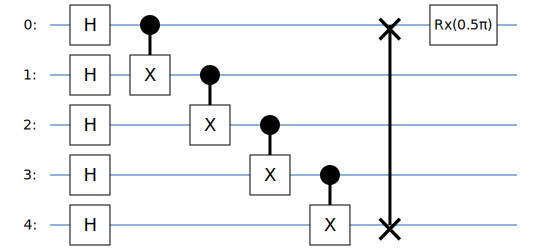

In [6]:
circuit = cirq.Circuit([cirq.H(q) for q in cirq.LineQubit.range(5)])
circuit.append([cirq.CNOT(q, q+1) for q in cirq.LineQubit.range(4)])
circuit.append([cirq.SWAP(q, q+4) for q in cirq.LineQubit.range(1)])
circuit.append([cirq.rx(np.pi/2).on(q) for q in cirq.LineQubit.range(1)])

SVGCircuit(circuit)

2) Implement a second circuit with a framework of your choice:

    a) Apply a Hadmard gate to the first qubit
    
    b) rotate the second qubit by pi/3 around X
    
    c) Apply Hadamard gate to the third and fourth qubit
    
    d) Perform a swap test between the states of the first and second qubit |q1 q2> and the third and fourth qubit |q3 q4>


In [7]:
qubits = cirq.LineQubit.range(4)
circuit = cirq.Circuit()
circuit.append(cirq.H(qubits[0]))
circuit.append(cirq.rx(np.pi / 3).on(qubits[1]))
circuit.append(cirq.H(qubits[2]))
circuit.append(cirq.H(qubits[3]))
circuit.append(cirq.SWAP(qubits[1], qubits[2]))
circuit.append(cirq.H(qubits[1]))
circuit.append(cirq.CNOT(qubits[2], qubits[3]))
circuit.append(cirq.H(qubits[2]))
circuit.append(cirq.measure(qubits[1], key='swap_test_result'))

In [9]:
print(circuit)

0: ───H────────────────────────────────────────────

1: ───Rx(0.333π)───×───H───M('swap_test_result')───
                   │
2: ───H────────────×───@───H───────────────────────
                       │
3: ───H────────────────X───────────────────────────


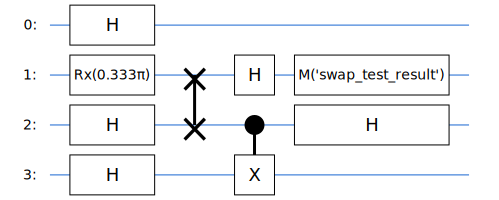

In [8]:
SVGCircuit(circuit)